In [1]:
import numpy as np
import pandas as pd

In [2]:
roadnet= np.fromfile('roadNet-PA.graph', dtype=np.int32).reshape(-1,2)
synthesized = np.fromfile('synthesized-1b.graph', dtype=np.int32).reshape(-1,2)

In [3]:
roadnet_df = pd.DataFrame(roadnet)
roadnet_df

,0,1
0,0,1
1,0,6309
2,0,6353
3,1,0
4,6353,0
...,...,...
3083791,1090892,1090891
3083792,1090901,1090894
3083793,1090902,1090894
3083794,1090903,1090894


In [4]:
roadnet_dist = roadnet_df[1].value_counts().value_counts()

<AxesSubplot:xlabel='In-Degree', ylabel='# Nodes'>

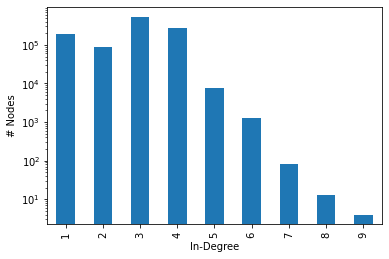

In [5]:
roadnet_dist.sort_index().plot.bar(logy=True, xlabel='In-Degree', ylabel='# Nodes')

In [6]:
roadnet_dist = roadnet_df[1].value_counts()

In [7]:
roadnet_dist.describe()

count    1.088092e+06
mean     2.834132e+00
std      1.016930e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      9.000000e+00
Name: 1, dtype: float64

In [8]:
roadnet_dist.quantile(q=0.94, interpolation='nearest')

4

In [9]:
synthesized_df = pd.DataFrame(synthesized)
synthesized_df

,0,1
0,0,8099
1,0,699624
2,0,890784
3,1,208276
4,1,447854
...,...,...
4780359,999588,999987
4780360,999597,999828
4780361,999849,999958
4780362,999887,999958


In [10]:
synthesized_dist = synthesized_df[1].value_counts()

In [11]:
synthesized_dist.describe()

count    689558.000000
mean          6.932505
std         139.155045
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max       53554.000000
Name: 1, dtype: float64

In [12]:
synthesized_dist.quantile(q=0.94, interpolation='nearest')

12

In [13]:
import os
files = os.listdir('results/replication/')
files

['edge-2-twitter.out.replication',
 'greedy-2-twitter.out.replication',
 'hybrid-2-twitter.out.replication',
 'edge-8-twitter.out.replication',
 'greedy-4-twitter.out.replication',
 'vertex-48-twitter.out.replication',
 'vertex-4-twitter.out.replication',
 'hybrid-8-twitter.out.replication',
 'edge-48-twitter.out.replication',
 'greedy-8-twitter.out.replication',
 'vertex-8-twitter.out.replication',
 'greedy-48-twitter.out.replication',
 'hybrid-4-twitter.out.replication',
 'edge-4-twitter.out.replication',
 'vertex-2-twitter.out.replication',
 'hybrid-48-twitter.out.replication']

In [14]:
files_info = list(map(lambda x: x.split('.')[0].split('-')[:-1], files))
files_info

[['edge', '2'],
 ['greedy', '2'],
 ['hybrid', '2'],
 ['edge', '8'],
 ['greedy', '4'],
 ['vertex', '48'],
 ['vertex', '4'],
 ['hybrid', '8'],
 ['edge', '48'],
 ['greedy', '8'],
 ['vertex', '8'],
 ['greedy', '48'],
 ['hybrid', '4'],
 ['edge', '4'],
 ['vertex', '2'],
 ['hybrid', '48']]

In [15]:
replication = []
for file in files:
    with open(f'results/replication/{file}') as f:
        replication.append(float(f.read().strip()))
        
replication

[1.9626266,
 1.3707672,
 1.5856625,
 6.045546,
 1.8157969,
 18.159407,
 3.637667,
 2.8850982,
 16.090775,
 2.351704,
 6.309912,
 4.993105,
 2.1990874,
 3.583493,
 1.9621427,
 5.66194]

In [16]:
data = list(map(lambda x: (x[0][0], int(x[0][1]),x[1]), zip(files_info, replication)))
data

[('edge', 2, 1.9626266),
 ('greedy', 2, 1.3707672),
 ('hybrid', 2, 1.5856625),
 ('edge', 8, 6.045546),
 ('greedy', 4, 1.8157969),
 ('vertex', 48, 18.159407),
 ('vertex', 4, 3.637667),
 ('hybrid', 8, 2.8850982),
 ('edge', 48, 16.090775),
 ('greedy', 8, 2.351704),
 ('vertex', 8, 6.309912),
 ('greedy', 48, 4.993105),
 ('hybrid', 4, 2.1990874),
 ('edge', 4, 3.583493),
 ('vertex', 2, 1.9621427),
 ('hybrid', 48, 5.66194)]

In [17]:
import pandas as pd
df = pd.DataFrame(data, columns=['Method','#Machines', 'Replication']).sort_values(['Method', '#Machines'])
df = df.pivot(index='#Machines', columns='Method', values='Replication').sort_values('#Machines')
df = df[['edge','vertex','greedy','hybrid']]
df

Method,edge,vertex,greedy,hybrid
#Machines,,,,
2,1.962627,1.962143,1.370767,1.585662
4,3.583493,3.637667,1.815797,2.199087
8,6.045546,6.309912,2.351704,2.885098
48,16.090775,18.159407,4.993105,5.661940


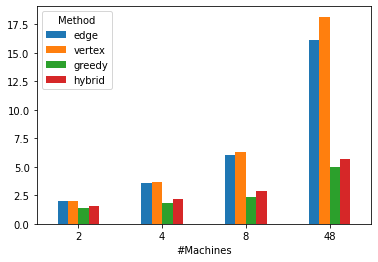

In [18]:
ax = df.plot.bar(rot=0)
fig = ax.get_figure()
fig.savefig('replication.png')

In [147]:
times = """12m6.433s
13m22.580s
14m7.557s
12m10.116s
12m13.724s
12m32.874s
11m52.545s
12m34.444s
12m24.732s
20m31.258s
18m39.782s
22m5.591s""".split()
names = """edge-2-twitter.out
edge-4-twitter.out
edge-8-twitter.out
vertex-2-twitter.out
vertex-4-twitter.out
vertex-8-twitter.out
hybrid-2-twitter.out
hybrid-4-twitter.out
hybrid-8-twitter.out
greedy-2-twitter.out
greedy-4-twitter.out
greedy-8-twitter.out""".split()
data= list(zip(times, names))
data = list(map(lambda x: (x[1].split('.')[0].split('-'), x[0]), data))
data = list(map(lambda x: (x[0][0], int(x[0][1]), x[1]), data))
data

[('edge', 2, '12m6.433s'),
 ('edge', 4, '13m22.580s'),
 ('edge', 8, '14m7.557s'),
 ('vertex', 2, '12m10.116s'),
 ('vertex', 4, '12m13.724s'),
 ('vertex', 8, '12m32.874s'),
 ('hybrid', 2, '11m52.545s'),
 ('hybrid', 4, '12m34.444s'),
 ('hybrid', 8, '12m24.732s'),
 ('greedy', 2, '20m31.258s'),
 ('greedy', 4, '18m39.782s'),
 ('greedy', 8, '22m5.591s')]

In [151]:
df = pd.DataFrame(data, columns=['Type', '#Machines','Time'])
df

,Type,#Machines,Time
0,edge,2,12m6.433s
1,edge,4,13m22.580s
2,edge,8,14m7.557s
3,vertex,2,12m10.116s
4,vertex,4,12m13.724s
5,vertex,8,12m32.874s
6,hybrid,2,11m52.545s
7,hybrid,4,12m34.444s
8,hybrid,8,12m24.732s
9,greedy,2,20m31.258s


In [162]:
print(df.to_latex(columns=['Type', '#Machines', 'Time'], index_names=False))

\begin{tabular}{llrl}
\toprule
{} &    Type &  \#Machines &        Time \\
\midrule
0  &    edge &          2 &   12m6.433s \\
1  &    edge &          4 &  13m22.580s \\
2  &    edge &          8 &   14m7.557s \\
3  &  vertex &          2 &  12m10.116s \\
4  &  vertex &          4 &  12m13.724s \\
5  &  vertex &          8 &  12m32.874s \\
6  &  hybrid &          2 &  11m52.545s \\
7  &  hybrid &          4 &  12m34.444s \\
8  &  hybrid &          8 &  12m24.732s \\
9  &  greedy &          2 &  20m31.258s \\
10 &  greedy &          4 &  18m39.782s \\
11 &  greedy &          8 &   22m5.591s \\
\bottomrule
\end{tabular}



In [204]:
files = list(map(lambda x: (x[:-10].split('-')[:-1], x), os.listdir('small_results/')))
files = list(map(lambda x: (x[0][0],int(x[0][1]), x[0][2], x[1]), files))
files

[('greedy', 4, 'synthesized', 'greedy-4-synthesized-1b.graph.out'),
 ('hybrid', 2, 'roadNet', 'hybrid-2-roadNet-PA.graph.out'),
 ('greedy', 4, 'roadNet', 'greedy-4-roadNet-PA.graph.out'),
 ('edge', 4, 'synthesized', 'edge-4-synthesized-1b.graph.out'),
 ('greedy', 8, 'roadNet', 'greedy-8-roadNet-PA.graph.out'),
 ('edge', 4, 'roadNet', 'edge-4-roadNet-PA.graph.out'),
 ('vertex', 4, 'roadNet', 'vertex-4-roadNet-PA.graph.out'),
 ('edge', 2, 'roadNet', 'edge-2-roadNet-PA.graph.out'),
 ('edge', 2, 'synthesized', 'edge-2-synthesized-1b.graph.out'),
 ('greedy', 8, 'synthesized', 'greedy-8-synthesized-1b.graph.out'),
 ('hybrid', 4, 'roadNet', 'hybrid-4-roadNet-PA.graph.out'),
 ('greedy', 2, 'synthesized', 'greedy-2-synthesized-1b.graph.out'),
 ('vertex', 2, 'roadNet', 'vertex-2-roadNet-PA.graph.out'),
 ('hybrid', 4, 'synthesized', 'hybrid-4-synthesized-1b.graph.out'),
 ('hybrid', 2, 'synthesized', 'hybrid-2-synthesized-1b.graph.out'),
 ('edge', 8, 'synthesized', 'edge-8-synthesized-1b.graph.out